<div align = 'center'>
<h1> Glass Prediction Model </h1>
</div>

<img src = "https://wallpapercave.com/wp/wp2361295.jpg">

### Introduction
Glass Prediction Model is a Machine Learning based frame work which will predict different criterias of the glasses depending on the input provided to the model. Let's have a look at the overview of the dataset,

*Columns:*
> * RI: refractive index
> * NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
> * NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
> * Mg: Magnesium
> * Al: Aluminum
> * K: Potassium
> * Ca: Calcium
> * Ba: Barium
> * Fe: Iron
> * Type of glass: 
>> * 1 building_windows_float_processed
>> * 2 building_windows_non_float_processed 
>> * 3 vehicle_windows_float_processed 
>> * 4 vehicle_windows_non_float_processed (none in this database) 
>> * 5 containers 
>> * 6 tableware 
>> * 7 headlamps


### Goal
The goal of this project is to build a machine learning model with highest accuracy, which will predict the glasses based on the given inputs.

### Dataset
The dataset for this project is taken from the UCI dataset website. Here is the link for the dataset, https://archive.ics.uci.edu/ml/datasets/glass+identification

### 1. Importing libraries and Dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [3]:
dataset = pd.read_csv('glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
# finding out the datatypes of the attributes.
dataset.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
# description of each of the attributes of the dataset.
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
dataset['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### 2. Exploratory Data Analysis (EDA) and Visualization: 
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


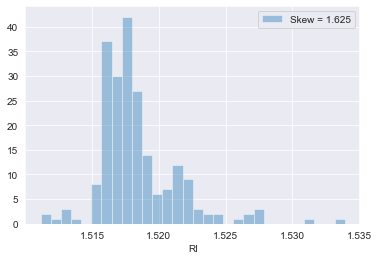

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


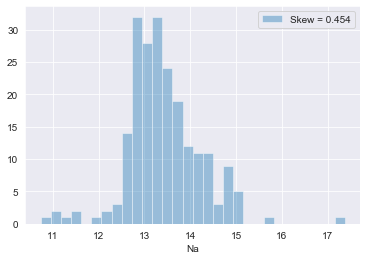

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


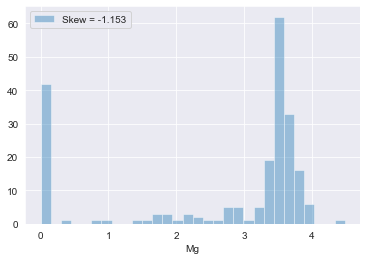

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


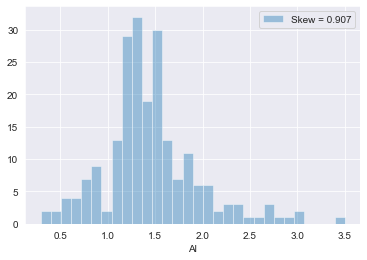

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


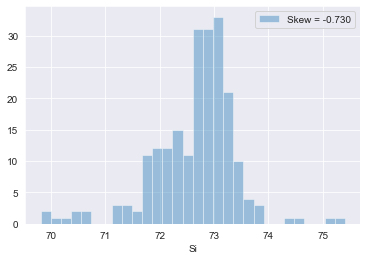

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


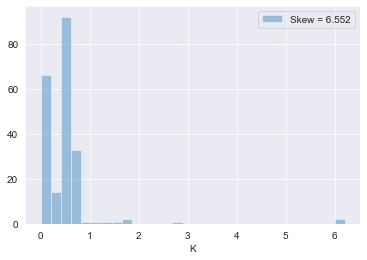

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


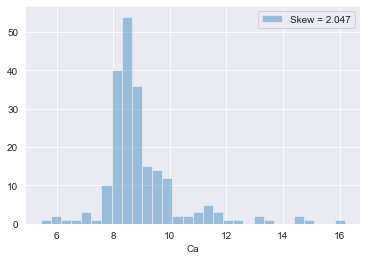

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


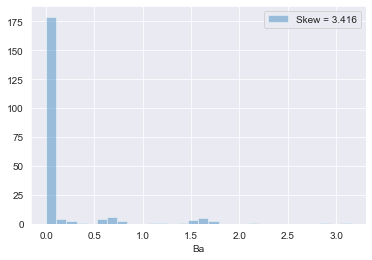

D:\my project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


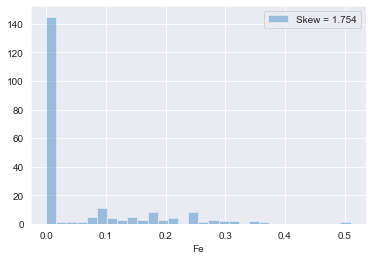

In [12]:
# Plotting and visualizing different attributes of the dataset using different plots.

features = dataset.columns[:-1].tolist()
for feat in features:
    skew = dataset[feat].skew()
    sns.distplot(dataset[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

* **Finding out the number of observations and outliers in the dataset.**

In [14]:
def outlier_hunt(dataset):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in dataset.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(dataset[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset[(dataset[col] < Q1 - outlier_step) | (dataset[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataset[features]))))   

The dataset contains 14 observations with more than 2 outliers


<Figure size 576x576 with 0 Axes>

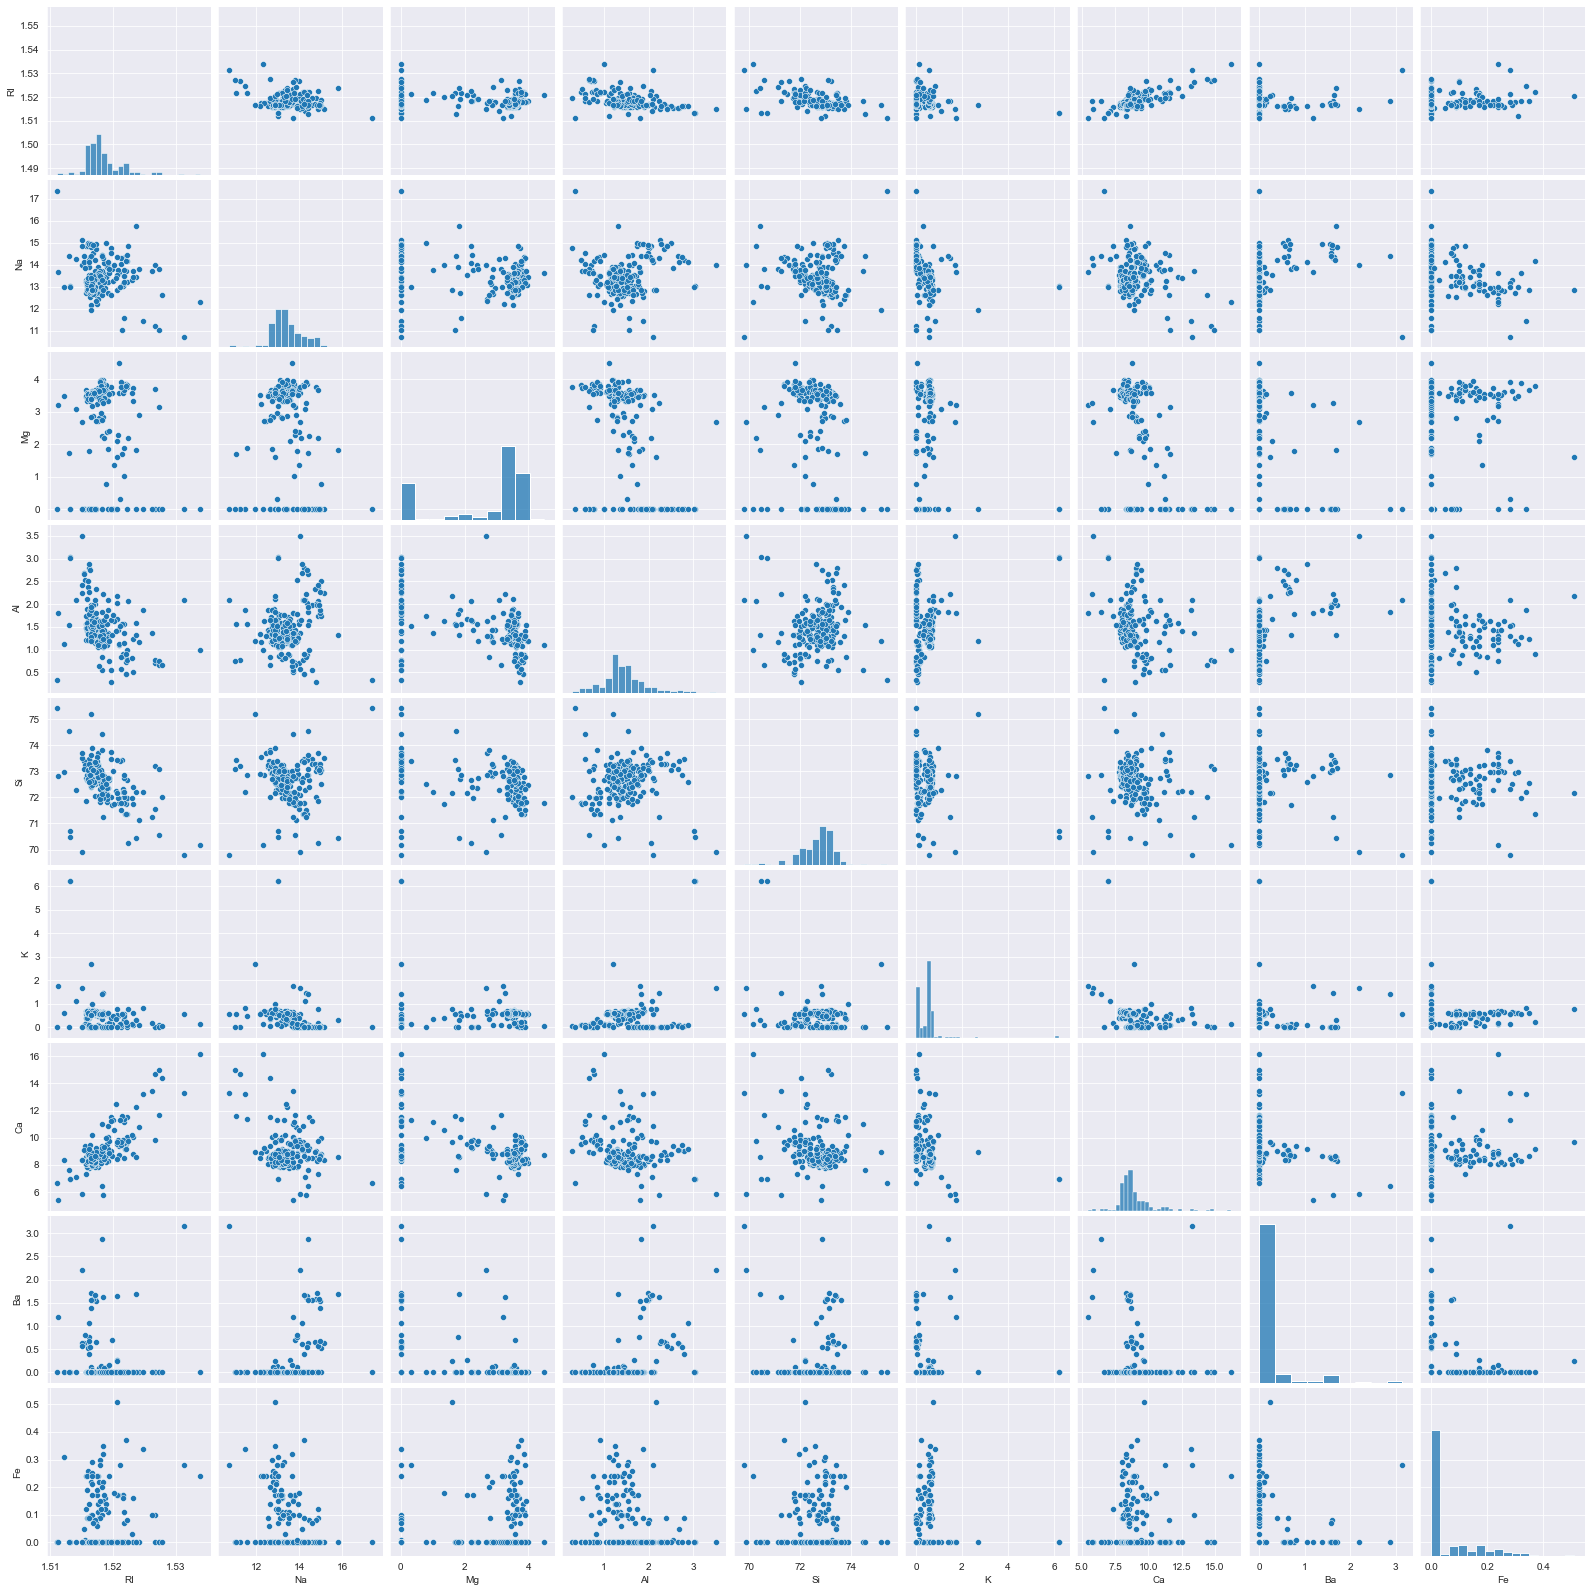

In [16]:
# plotting different features in the pairplot category
plt.figure(figsize=(8,8))
sns.pairplot(dataset[features],palette='coolwarm')
plt.show()

D:\my project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


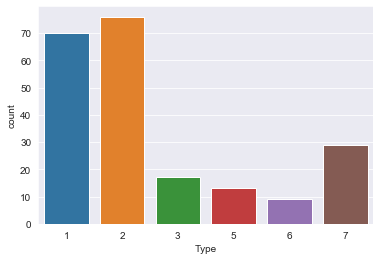

In [17]:
# showcasing the count plot which will count the types of the attributes.
sns.countplot(dataset['Type'])
plt.show()

*******************************

### 3. Model Creation
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Here after visualizing the dataset I have decided to go with these models -
* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Gausian NB** : This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.


* **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


* **XgBoost Classifier Algortihm** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.


* **Gradient Boosting Algorithm** : Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.



* **AdaBoosting Algorithm** : AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.


* **MLP Classifier Algorithm** : MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


* **Gradient Descent Classifier** : Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.


Let's deploy the models!!

Now, as we have done all the required visualisations and data wrangling/cleaning operations, we shall focus on applying numerous ML algorithms to see if we can predict the glasses accurately or, not.

### Splitting the data into train and test data
  
  * Importing the library from the sklearn.model_selection
  * Split the dataset into 75:25 ratio
  * X_train and y_train are the trainning datasets
  * X_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [18]:
X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [20]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


*Importing required libraries for the Model creation.*

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json
from sklearn import metrics

**Finding out the Correlation of the attributes.**

In [103]:
pd.DataFrame (dataset.corr().round(2))

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Type,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


### A. Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [104]:
logReg = LogisticRegression(max_iter = 5000)

In [105]:
logReg.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=5000)

In [106]:
logReg.score(X_train, y_train)

0.63125

In [107]:
logReg.score(X_test, y_test)

0.6481481481481481

In [109]:
y_pred_dt_test = logReg.predict(X_test)

In [112]:
print('Accuracy of Logistic Regression Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Logistic Regression Model: 0.6481481481481481


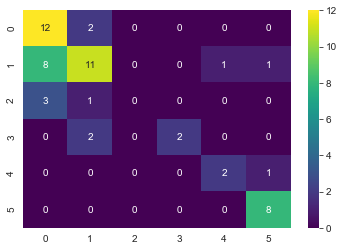

In [113]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### B. Decision Tree Classifier Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [114]:
dtc = DecisionTreeClassifier()

In [115]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [116]:
dtc.score(X_train, y_train)

1.0

In [117]:
dtc.score(X_test, y_test)

0.7037037037037037

In [118]:
dtce = DecisionTreeClassifier(criterion = 'entropy')

In [119]:
dtce.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [120]:
dtce.score(X_train, y_train)

1.0

In [121]:
dtce.score(X_test, y_test)

0.7592592592592593

In [122]:
y_pred_dt_test = dtc.predict(X_test)

In [123]:
print('Accuracy of Decision Tree Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Decision Tree Classifier Model: 0.7037037037037037


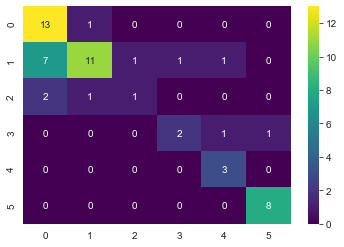

In [124]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### C. Random Forest Classifier Algorithm

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [125]:
rfc = RandomForestClassifier()

In [126]:
rfc.fit(X_train, y_train)

D:\my project\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [127]:
rfc.score(X_train, y_train)

1.0

In [128]:
rfc.score(X_test, y_test)

0.7962962962962963

In [129]:
y_pred_dt_test = rfc.predict(X_test)

In [130]:
print('Accuracy of Random Forest Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Random Forest Classifier Model: 0.7962962962962963


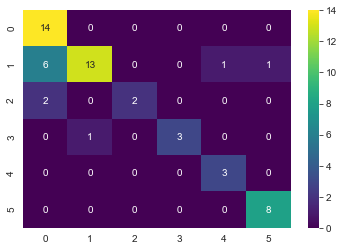

In [131]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### D. K-Nearest Neighbours Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [132]:
from sklearn.neighbors import KNeighborsClassifier  

In [133]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [134]:
classifier.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [135]:
classifier.score(X_train, y_train)

0.7375

In [136]:
classifier.score(X_test, y_test)

0.6296296296296297

In [137]:
y_pred_dt_test = classifier.predict(X_test)

In [138]:
print('Accuracy of KNN Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of KNN Classifier Model: 0.6296296296296297


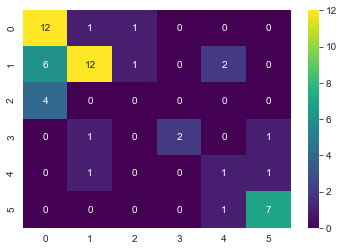

In [139]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### E. Gausian NB Algorithm

This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.

In [140]:
gnb = GaussianNB()

In [141]:
gnb.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [142]:
gnb.score(X_train, y_train)

0.3125

In [143]:
gnb.score(X_test, y_test)

0.35185185185185186

In [144]:
y_pred_dt_test = gnb.predict(X_test)

In [145]:
print('Accuracy of Gaussian Naive Bayes Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Gaussian Naive Bayes Classifier Model: 0.35185185185185186


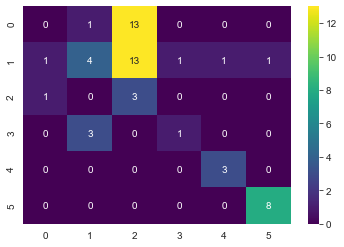

In [146]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### F. Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [147]:
classifier_svm = SVC()

In [148]:
classifier_svm.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [149]:
classifier_svm.score(X_train, y_train)

0.35

In [150]:
classifier_svm.score(X_test, y_test)

0.25925925925925924

In [151]:
y_pred_dt_test = classifier_svm.predict(X_test)

In [152]:
print('Accuracy of Support Vector Machine Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Support Vector Machine Model: 0.25925925925925924


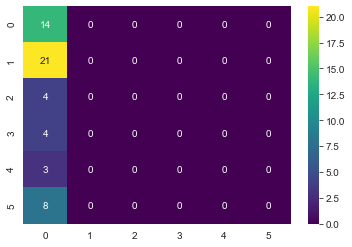

In [153]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### G. XGBoost classifier
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.


In [154]:
from xgboost import XGBClassifier
xg = XGBClassifier()

In [155]:
xg.fit(X_train, y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(objective='multi:softprob')

In [156]:
xg.score(X_train, y_train)

1.0

In [157]:
xg.score(X_test, y_test)

0.7962962962962963

In [158]:
y_pred_dt_test = xg.predict(X_test)

In [159]:
print('Accuracy of XgBoost Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of XgBoost Classifier Model: 0.7962962962962963


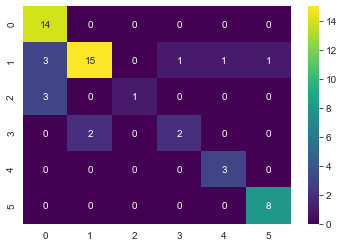

In [160]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### H. Gradient Boosting Classifier
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.


In [173]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [174]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(X_train,y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier(max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=1000,
                           random_state=2)

In [175]:
gfc.score(X_train, y_train)

1.0

In [176]:
gfc.score(X_test, y_test)

0.8148148148148148

In [177]:
y_pred_dt_test = gfc.predict(X_test)

In [178]:
print('Accuracy of Gradient Boosting Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Gradient Boosting Classifier Model: 0.8148148148148148


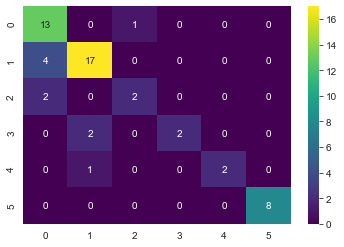

In [179]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### I. AdaBoost Classifier
AdaBoost, short for Adaptive Boosting, is a statistical classification meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance.

In [189]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train,y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [190]:
abc.score(X_train, y_train)

0.48125

In [191]:
abc.score(X_test, y_test)

0.48148148148148145

In [192]:
y_pred_dt_test = abc.predict(X_test)

In [193]:
print('Accuracy of AdaBoost Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of AdaBoost Classifier Model: 0.48148148148148145


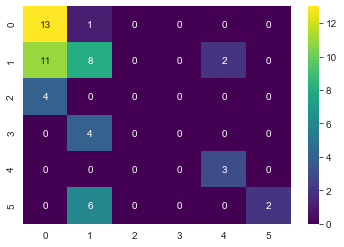

In [194]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### J. Stochastic Gradient Descent Classifier
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

In [195]:
from sklearn.linear_model import SGDClassifier

In [196]:
SGDClf = SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")

In [197]:
SGDClf.fit(X_train,y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier(penalty='elasticnet')

In [198]:
SGDClf.score(X_train, y_train)

0.4

In [199]:
SGDClf.score(X_test, y_test)

0.37037037037037035

In [200]:
y_pred_dt_test = SGDClf.predict(X_test)

In [201]:
print('Accuracy of Stochastic Gradient Descent Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Stochastic Gradient Descent Classifier Model: 0.37037037037037035


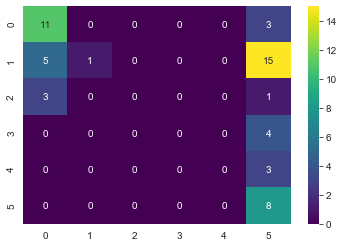

In [202]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### K. MLP Classifier
MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification

In [203]:
mlp=MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train,y_train)

D:\my project\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\my project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=1, max_iter=1000)

In [204]:
mlp.score(X_train, y_train)

0.775

In [205]:
mlp.score(X_test, y_test)

0.7407407407407407

In [206]:
y_pred_dt_test = mlp.predict(X_test)

In [207]:
print('Accuracy of MLP Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of MLP Classifier Model: 0.7407407407407407


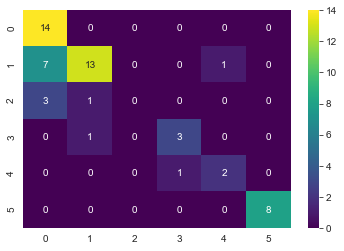

In [208]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

**********************************
### Comparative analysis among the algorithms for this project

We have deployed eleven machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|0.6481481481481481|
|Decision Tree Classifier|0.7037037037037037|
|Random Forest Classifier|0.7962962962962963|
|Gausian NB Algorithm|0.6296296296296297|
|KNN Algorithm|0.35185185185185186|
|Support Vector Machine Algorithm|0.25925925925925924|
| XgBoost Classifier |0.7962962962962963|
| Gradient Boosting Classifier |0.8148148148148148|
| AdaBoost Classifier |0.48148148148148145|
| Stochastic Gradient Descent Classifier |0.37037037037037035|
| MLP Classifier |0.7407407407407407|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Gradient Boosting Classifier is having the upper hand in case of this dataset and after this, we can use XgBoost Classifier and Random Forest Classifier, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Gradient Boosting Classifier
2. XgBoost Classifier
3. Random Forest Classifier
4. MLP Classifier

*****************


### Creating the model using Gradient Boosting Classifier

In [211]:
import pickle

In [213]:
filename = 'final_glass_prediction_model.pkl'
pickle.dump(gfc, open(filename, 'wb'))

*Checking the model is working or, not!*

In [214]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8148148148148148


****************
Thank You! Stay Safe! Stay Home!

**Contributed By,**
### Abhishek Sharma, 2022.
Participant of DevHack'22
* LinkedIn Profile: https://linkedin.com/in/abhishek-sharma-aa06a9183/
* GitHub Profile: https://github.com/abhisheks008